In [1]:
# Importing all the libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from statistics import mode
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn import preprocessing


In [2]:
# read in data
df = pd.read_csv('laterality_data.csv')

In [3]:
# check in on data
df.head()

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,...,LI MD,LI Volume,TOI,Control,category,hand,Hand,ROI 1,ROI 2,Type
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,...,0.015758,-0.068848,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,...,NaN,0.167642,no,yes,Language,NaN,NaN,Frontal,Temporal,Association
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,...,NaN,0.010843,yes,no,Vertical,NaN,NaN,Frontal,Frontal,Association
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,...,0.002403,-0.012036,no,no,Motor,NaN,NaN,Medulla,Motor Cortex,Projection
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,...,-0.014053,-0.066723,no,no,Cerebellar,NaN,NaN,Frontal,Cerebellum,Projection


In [4]:
df.count()

Match Flag            44648
subjectID             44648
Data                  44648
Order_FA_child        44648
Order_volume_child    44648
Order_MD_child        44648
structureID           44648
gender                44648
gender_non            44648
Age_gr_12             44648
Age Group             44648
Age                   44648
LI FA                 41241
LI MD                 41272
LI Volume             41040
TOI                   44648
Control               44648
category              44648
hand                  43510
Hand                  43390
ROI 1                 44648
ROI 2                 44648
Type                  44648
dtype: int64

In [5]:
cols = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,20,21]
df = df[df.columns[cols]]
df

,Match Flag,subjectID,Data,Order_FA_child,Order_volume_child,Order_MD_child,structureID,gender,gender_non,Age_gr_12,Age Group,Age,LI FA,LI MD,LI Volume,TOI,Control,category,ROI 1,ROI 2
0,3,P1158,PING,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,AnterioFrontoCerebellar,0,M,0-12,Child,3.416667,-0.003511,0.015758,-0.068848,no,no,Cerebellar,Frontal,Cerebellum
1,3,P1158,PING,Arc,Arc,Arc,Arc,0,M,0-12,Child,3.416667,0.034870,NaN,0.167642,no,yes,Language,Frontal,Temporal
2,3,P1158,PING,Aslant,Aslant,Aslant,Aslant,0,M,0-12,Child,3.416667,-0.010014,NaN,0.010843,yes,no,Vertical,Frontal,Frontal
3,3,P1158,PING,CST,CST,CST,CST,0,M,0-12,Child,3.416667,NaN,0.002403,-0.012036,no,no,Motor,Medulla,Motor Cortex
4,3,P1158,PING,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,ContraAnterioFrontoCerebellar,0,M,0-12,Child,3.416667,0.006478,-0.014053,-0.066723,no,no,Cerebellar,Frontal,Cerebellum
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44643,3,CC721374,CAMCAN,MotorThalamic,MotorThalamic,MotorThalamic,MotorThalamic,0,M,80->,Senior,86.000000,0.046822,-0.035798,0.025188,no,no,Cerebellar,Thalamic,Motor Cortex
44644,3,CC721374,CAMCAN,pArc,pArc,pArc,pArc,0,M,80->,Senior,86.000000,-0.047697,0.038274,-0.058535,yes,no,Posterior Vertical,Temporal,Parietal
44645,3,CC721374,CAMCAN,ParietoThalamic,ParietoThalamic,ParietoThalamic,ParietoThalamic,0,M,80->,Senior,86.000000,NaN,-0.017686,-0.037982,no,no,Thalamic,Parietal,Thalamic
44646,3,CC721374,CAMCAN,SpinoThalamic,SpinoThalamic,SpinoThalamic,SpinoThalamic,0,M,80->,Senior,86.000000,0.019873,-0.000048,0.016270,no,no,Thalamic,Medulla,Thalamic


In [6]:
# dropping all NA's or missing data
df.dropna(inplace=True)

In [7]:
df.count()

Match Flag            35595
subjectID             35595
Data                  35595
Order_FA_child        35595
Order_volume_child    35595
Order_MD_child        35595
structureID           35595
gender                35595
gender_non            35595
Age_gr_12             35595
Age Group             35595
Age                   35595
LI FA                 35595
LI MD                 35595
LI Volume             35595
TOI                   35595
Control               35595
category              35595
ROI 1                 35595
ROI 2                 35595
dtype: int64

In [8]:
df.describe()

,Match Flag,gender,Age,LI FA,LI MD,LI Volume
count,35595.0,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000
mean,3.0,0.555303,35.876978,0.014642,-0.008911,0.003643
std,0.0,0.496939,15.315036,0.026695,0.024202,0.111180
min,3.0,0.000000,3.416667,-0.187483,-0.120564,-0.805225
25%,3.0,0.000000,27.000000,-0.001329,-0.023455,-0.052887
50%,3.0,1.000000,31.000000,0.013918,-0.008472,0.007771
75%,3.0,1.000000,37.000000,0.029680,0.005501,0.063533
max,3.0,1.000000,86.000000,0.237326,0.141657,0.649430


In [9]:
# find all the columns for the features that we desire adn create a new dataframe
cols = [12]
the_ml_data = df[df.columns[cols]]

In [10]:
# Check in on data 
the_ml_data.head()
the_ml_data.count()

LI FA    35595
dtype: int64

In [11]:
# Find quick statistics about each feature
the_ml_data.describe()

,LI FA
count,35595.000000
mean,0.014642
std,0.026695
min,-0.187483
25%,-0.001329
50%,0.013918
75%,0.029680
max,0.237326


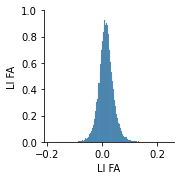

In [12]:
# create a pairplot to visually see correlations between data
sns.pairplot(the_ml_data, palette = 'magma')

## Machine Learning Model

#### Using elbow method to see how many clusters that will be most efficient for algorithm

In [13]:
# Normalize the data
# use min-max scaling to normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
the_ml_data = min_max_scaler.fit_transform(the_ml_data)
the_ml_data = pd.DataFrame(the_ml_data)

In [14]:
the_ml_data

,0
0,0.433071
1,0.456584
2,0.462352
3,0.471037
4,0.423066
...,...
35590,0.276417
35591,0.510379
35592,0.551555
35593,0.329056


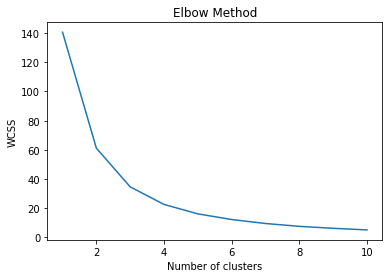

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(the_ml_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

###### Three Clusters seeem to be the best from the analysis above, but since we only have 1000 datapoints, 10 should be better as outliers would make their own clusters!

In [16]:
df.describe()

,Match Flag,gender,Age,LI FA,LI MD,LI Volume
count,35595.0,35595.000000,35595.000000,35595.000000,35595.000000,35595.000000
mean,3.0,0.555303,35.876978,0.014642,-0.008911,0.003643
std,0.0,0.496939,15.315036,0.026695,0.024202,0.111180
min,3.0,0.000000,3.416667,-0.187483,-0.120564,-0.805225
25%,3.0,0.000000,27.000000,-0.001329,-0.023455,-0.052887
50%,3.0,1.000000,31.000000,0.013918,-0.008472,0.007771
75%,3.0,1.000000,37.000000,0.029680,0.005501,0.063533
max,3.0,1.000000,86.000000,0.237326,0.141657,0.649430


In [17]:
# other part
km = KMeans(n_clusters=6).fit(the_ml_data)

# create another dataframe
cluster_map = pd.DataFrame()
cluster_map['ID'] = df['subjectID']
cluster_map['data_index'] = the_ml_data.index.values
cluster_map['cluster'] = km.labels_ ########## This is where we put in the clusters that were found
cluster_map['Gender'] = pd.Series(df['gender'])
cluster_map['Age'] = pd.Series(df['Age'])
cluster_map['FA'] = df['LI FA']
cluster_map['Area'] = df['Order_FA_child']
cluster_map['AgeGroup'] = df['Age Group']
cluster_map['Category'] = df['category']
cluster_map

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup,Category
0,P1158,0,0,0,3.416667,-0.003511,AnterioFrontoCerebellar,Child,Cerebellar
4,P1158,1,2,0,3.416667,0.006478,ContraAnterioFrontoCerebellar,Child,Cerebellar
5,P1158,2,2,0,3.416667,0.008928,ContraMotorCerebellar,Child,Cerebellar
10,P1158,3,2,0,3.416667,0.012617,MotorCerebellar,Child,Cerebellar
11,P1158,4,0,0,3.416667,-0.007761,OccipitoCerebellar,Child,Cerebellar
...,...,...,...,...,...,...,...,...,...
44640,CC721374,35590,3,0,86.000000,-0.070059,VOF,Senior,Vertical
44641,CC721374,35591,5,0,86.000000,0.029330,FrontoThalamic,Senior,Thalamic
44643,CC721374,35592,1,0,86.000000,0.046822,MotorThalamic,Senior,Cerebellar
44644,CC721374,35593,3,0,86.000000,-0.047697,pArc,Senior,Posterior Vertical


In [18]:
first_cluster = cluster_map[cluster_map.cluster == 0]
first_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup,Category
0,P1158,0,0,0,3.416667,-0.003511,AnterioFrontoCerebellar,Child,Cerebellar
11,P1158,4,0,0,3.416667,-0.007761,OccipitoCerebellar,Child,Cerebellar
12,P1158,5,0,0,3.416667,-0.007207,ParietoCerebellar,Child,Cerebellar
34,P1391,12,0,0,3.500000,-0.001801,CST,Child,Motor
39,P1391,17,0,0,3.500000,-0.003359,MotorCerebellar,Child,Cerebellar


In [19]:
second_cluster = cluster_map[cluster_map.cluster == 1]
second_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup,Category
37,P1391,15,1,0,3.50,0.051487,MDLFang,Child,Posterior Vertical
120,P1272,78,1,1,7.25,0.049066,MDLFspl,Child,Posterior Vertical
130,P1272,85,1,1,7.25,0.055294,Cingulum,Child,Emotion
137,P1272,90,1,1,7.25,0.042294,TemporoThalamic,Child,Thalamic
160,P1330,106,1,1,7.25,0.042161,Cingulum,Child,Emotion


In [20]:
third_cluster = cluster_map[cluster_map.cluster == 2]
third_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup,Category
4,P1158,1,2,0,3.416667,0.006478,ContraAnterioFrontoCerebellar,Child,Cerebellar
5,P1158,2,2,0,3.416667,0.008928,ContraMotorCerebellar,Child,Cerebellar
10,P1158,3,2,0,3.416667,0.012617,MotorCerebellar,Child,Cerebellar
17,P1158,7,2,0,3.416667,0.007992,Uncinate,Child,Language
31,P1391,10,2,0,3.500000,0.016760,AnterioFrontoCerebellar,Child,Cerebellar


In [21]:
fourth_cluster = cluster_map[cluster_map.cluster == 3]
fourth_cluster.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup,Category
41,P1391,19,3,0,3.50,-0.032345,ParietoCerebellar,Child,Cerebellar
45,P1391,23,3,0,3.50,-0.032743,ThalamicoCerebellar,Child,Cerebellar
63,P1528,34,3,1,4.25,-0.025190,ContraAnterioFrontoCerebellar,Child,Cerebellar
69,P1528,40,3,1,4.25,-0.038320,SLF3,Child,Dorsal Horizontal
125,P1272,83,3,1,7.25,-0.040871,SLF3,Child,Dorsal Horizontal


In [22]:
c5 = cluster_map[cluster_map.cluster == 4]
c5.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup,Category
49,P1391,26,4,0,3.50,0.078489,Cingulum,Child,Emotion
298,P1132,209,4,0,8.25,0.095011,Cingulum,Child,Emotion
409,P0787,295,4,1,9.50,0.093027,Cingulum,Child,Emotion
437,P0633,319,4,0,9.75,0.070039,Cingulum,Child,Emotion
471,P0918,352,4,1,11.00,0.083649,SpinoThalamic,Child,Thalamic


In [23]:
c6 = cluster_map[cluster_map.cluster == 5]
c6.head()

,ID,data_index,cluster,Gender,Age,FA,Area,AgeGroup,Category
16,P1158,6,5,0,3.416667,0.019657,ThalamicoCerebellar,Child,Cerebellar
22,P1158,8,5,0,3.416667,0.019932,Meyer,Child,Thalamic
26,P1158,9,5,0,3.416667,0.027998,SpinoThalamic,Child,Thalamic
38,P1391,16,5,0,3.500000,0.036872,MDLFspl,Child,Posterior Vertical
47,P1391,24,5,0,3.500000,0.033945,VOF,Child,Vertical


In [24]:
print('First Cluster:', first_cluster.count())
print('Second Cluster:', second_cluster.count())
print('Third Cluster:', third_cluster.count())
print('Fourth Cluster:', fourth_cluster.count())
print('5th Cluster:', c5.count())
print('6th Cluster:', c6.count())

First Cluster: ID            7251
data_index    7251
cluster       7251
Gender        7251
Age           7251
FA            7251
Area          7251
AgeGroup      7251
Category      7251
dtype: int64
Second Cluster: ID            4849
data_index    4849
cluster       4849
Gender        4849
Age           4849
FA            4849
Area          4849
AgeGroup      4849
Category      4849
dtype: int64
Third Cluster: ID            10761
data_index    10761
cluster       10761
Gender        10761
Age           10761
FA            10761
Area          10761
AgeGroup      10761
Category      10761
dtype: int64
Fourth Cluster: ID            2115
data_index    2115
cluster       2115
Gender        2115
Age           2115
FA            2115
Area          2115
AgeGroup      2115
Category      2115
dtype: int64
5th Cluster: ID            1182
data_index    1182
cluster       1182
Gender        1182
Age           1182
FA            1182
Area          1182
AgeGroup      1182
Category      1182
dtype: in

In [25]:
# Creating Graphs for all of the features that we want

dict_age_cluster = {
    'Cluster1': first_cluster['Age'].mean(),
    'Cluster2': second_cluster['Age'].mean(),
    'Cluster3': third_cluster['Age'].mean(),
    'Cluster4': fourth_cluster['Age'].mean(),
    'Cluster5': c5['Age'].mean(),
    'Cluster6': c6['Age'].mean()

}
age_cluster = pd.Series(dict_age_cluster)


dict_FA_cluster = {
    'Cluster1': first_cluster['FA'].mean(),
    'Cluster2': second_cluster['FA'].mean(),
    'Cluster3': third_cluster['FA'].mean(),
    'Cluster4': fourth_cluster['FA'].mean(),
    'Cluster5': c5['FA'].mean(),
    'Cluster6': c6['FA'].mean()

}
FA_cluster = pd.Series(dict_FA_cluster)




dict_gender_cluster = {
    'Cluster1': first_cluster['Gender'].mean(),
    'Cluster2': second_cluster['Gender'].mean(),
    'Cluster3': third_cluster['Gender'].mean(),
    'Cluster4': fourth_cluster['Gender'].mean(),
    'Cluster5': c5['Gender'].mean(),
    'Cluster6': c6['Gender'].mean()

}
gender_cluster = pd.Series(dict_gender_cluster)

dict_Area_cluster = {
    'Cluster1': first_cluster['Area'],
    'Cluster2': second_cluster['Area'],
    'Cluster3': third_cluster['Area'],
    'Cluster4': fourth_cluster['Area'],
    'Cluster5': c5['Area'],
    'Cluster6': c6['Area']

}
area_cluster = pd.Series(dict_Area_cluster)

dict_agegroup_cluster = {
    'Cluster1': first_cluster['AgeGroup'],
    'Cluster2': second_cluster['AgeGroup'],
    'Cluster3': third_cluster['AgeGroup'],
    'Cluster4': fourth_cluster['AgeGroup'],
    'Cluster5': c5['AgeGroup'],
    'Cluster6': c6['AgeGroup']

}
agegroup_cluster = pd.Series(dict_agegroup_cluster)

dict_cat_cluster = {
    'Cluster1': first_cluster['Category'],
    'Cluster2': second_cluster['Category'],
    'Cluster3': third_cluster['Category'],
    'Cluster4': fourth_cluster['Category'],
    'Cluster5': c5['Category'],
    'Cluster6': c6['Category']

}
cat_cluster = pd.Series(dict_cat_cluster)



total_features_dict = {
    'Age': age_cluster,
    'FA':FA_cluster,
    'Gender': gender_cluster,
    'Area': area_cluster,
    'AgeGroup': agegroup_cluster,
    'Category': cat_cluster
}


In [26]:
total_features = pd.DataFrame(total_features_dict)
total_features

,Age,FA,Gender,Area,AgeGroup,Category
Cluster1,34.557063,-0.009950,0.558130,0 AnterioFrontoCerebellar 11 ...,0 Child 11 Child 12 Chil...,0 Cerebellar 11 C...
Cluster2,37.512258,0.048171,0.543617,37 MDLFang 120 ...,37 Child 120 Child 130 Chil...,37 Posterior Vertical 120 Posterior...
Cluster3,35.439882,0.008892,0.566769,4 ContraAnterioFrontoCerebellar 5 ...,4 Child 5 Child 10 Chil...,4 Cerebellar 5 C...
Cluster4,35.418502,-0.039096,0.519149,41 ParietoCerebellar 45 ...,41 Child 45 Child 63 Chil...,41 Cerebellar 45 C...
Cluster5,38.886542,0.083212,0.482234,49 Cingulum 298 ...,49 Child 298 Child 409 Chil...,49 Emotion 298 ...
Cluster6,36.275114,0.026321,0.563315,16 ThalamicoCerebellar 22 ...,16 Child 22 Child 26 Chil...,16 Cerebellar 22 ...


[Text(0.5, 1.0, 'Gender vs. Cluster')]

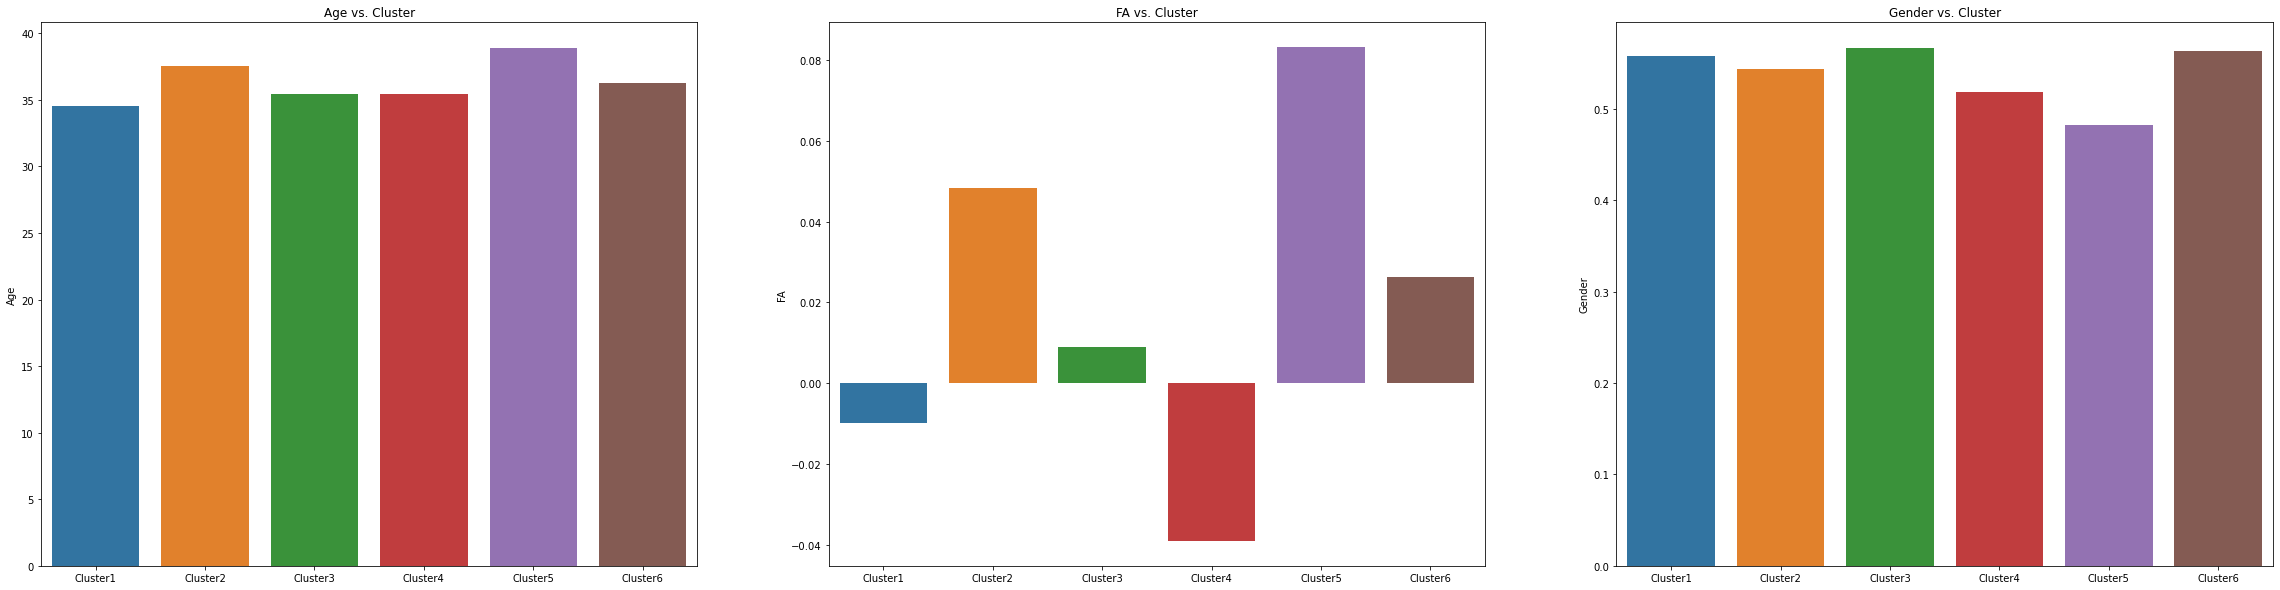

In [27]:
fig, ax = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(x=clusters, y=total_features['Age'],ax=ax[0]).set(title = 'Age vs. Cluster')
sns.barplot(x=clusters, y=total_features['FA'],ax=ax[1]).set(title = 'FA vs. Cluster')
sns.barplot(x=clusters, y=total_features['Gender'],ax=ax[2]).set(title = 'Gender vs. Cluster')



### Looking into each one of the clusters to see the different patterns they might have 

(-0.0, 0.6)

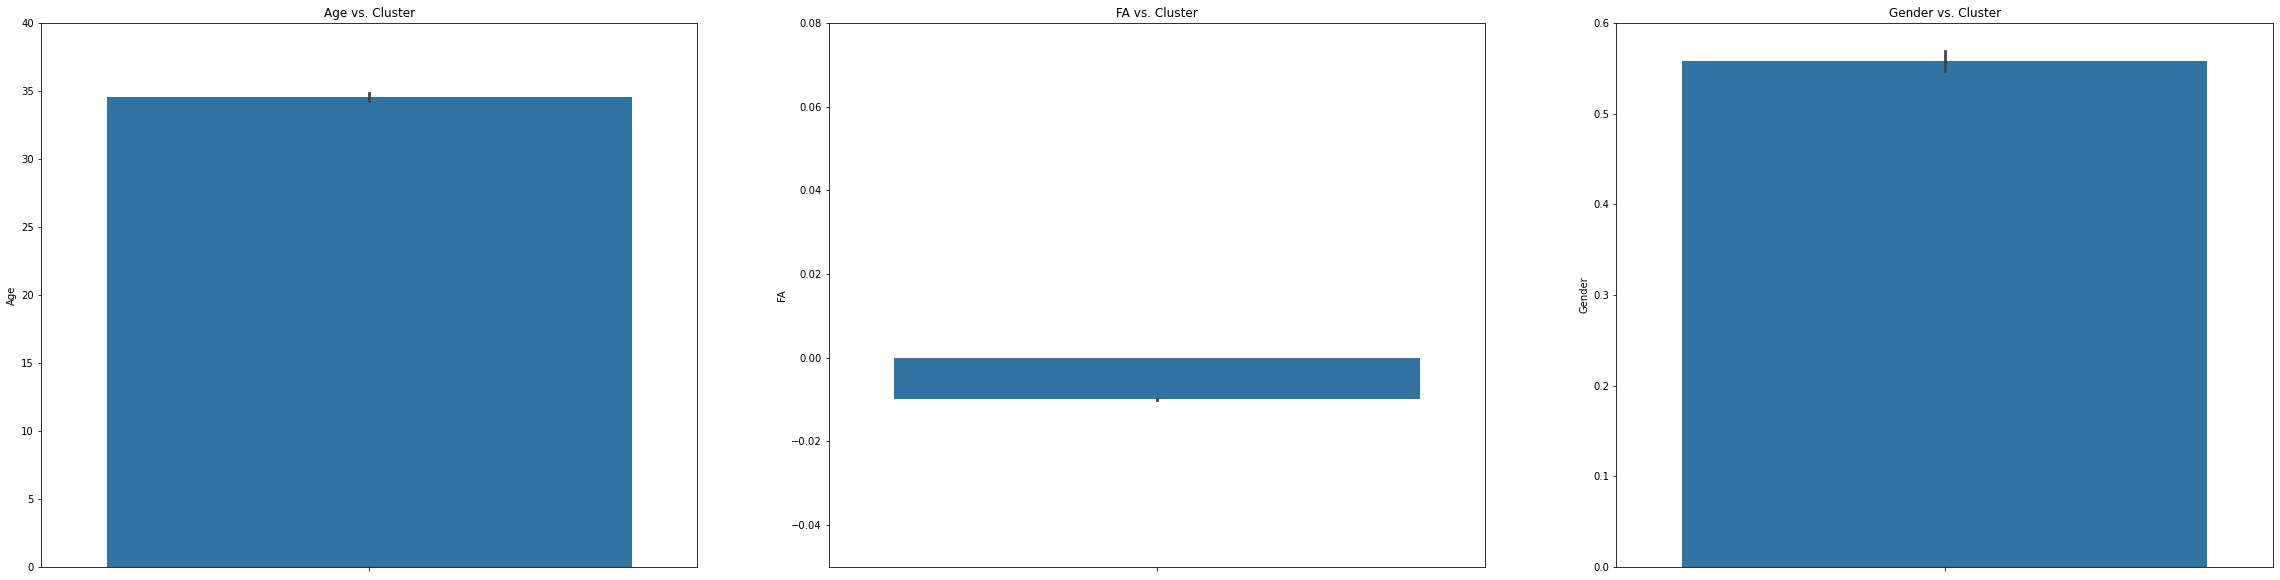

In [28]:
fig1, ax1 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=first_cluster['Age'],ax=ax1[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=first_cluster['FA'],ax=ax1[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=first_cluster['Gender'],ax=ax1[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)


(-0.0, 0.6)

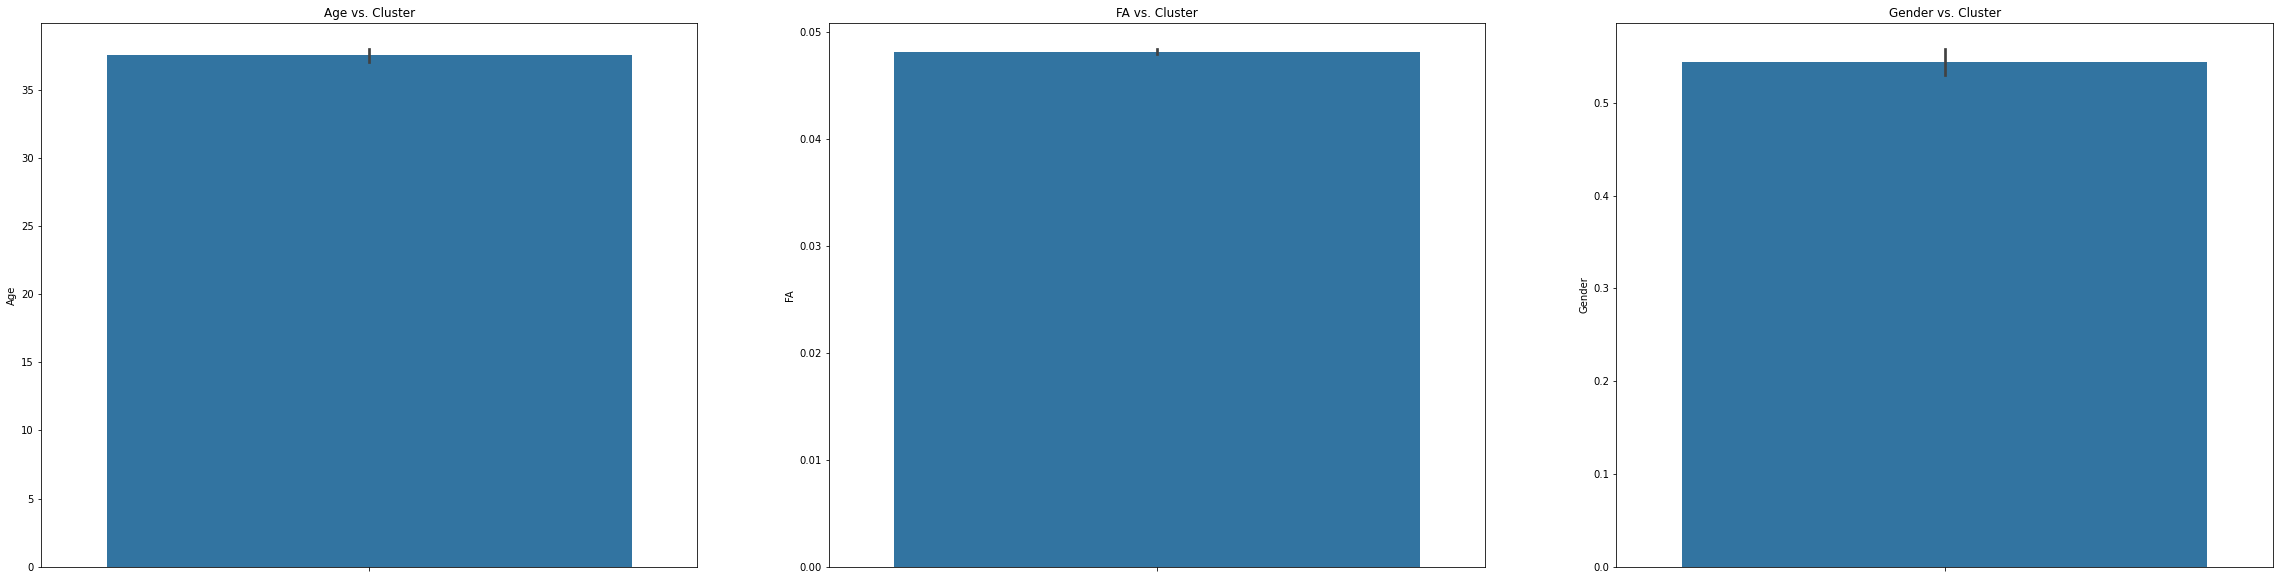

In [29]:
fig2, ax2 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=second_cluster['Age'],ax=ax2[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=second_cluster['FA'],ax=ax2[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=second_cluster['Gender'],ax=ax2[2]).set(title = 'Gender vs. Cluster')

# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)



(-0.0, 0.6)

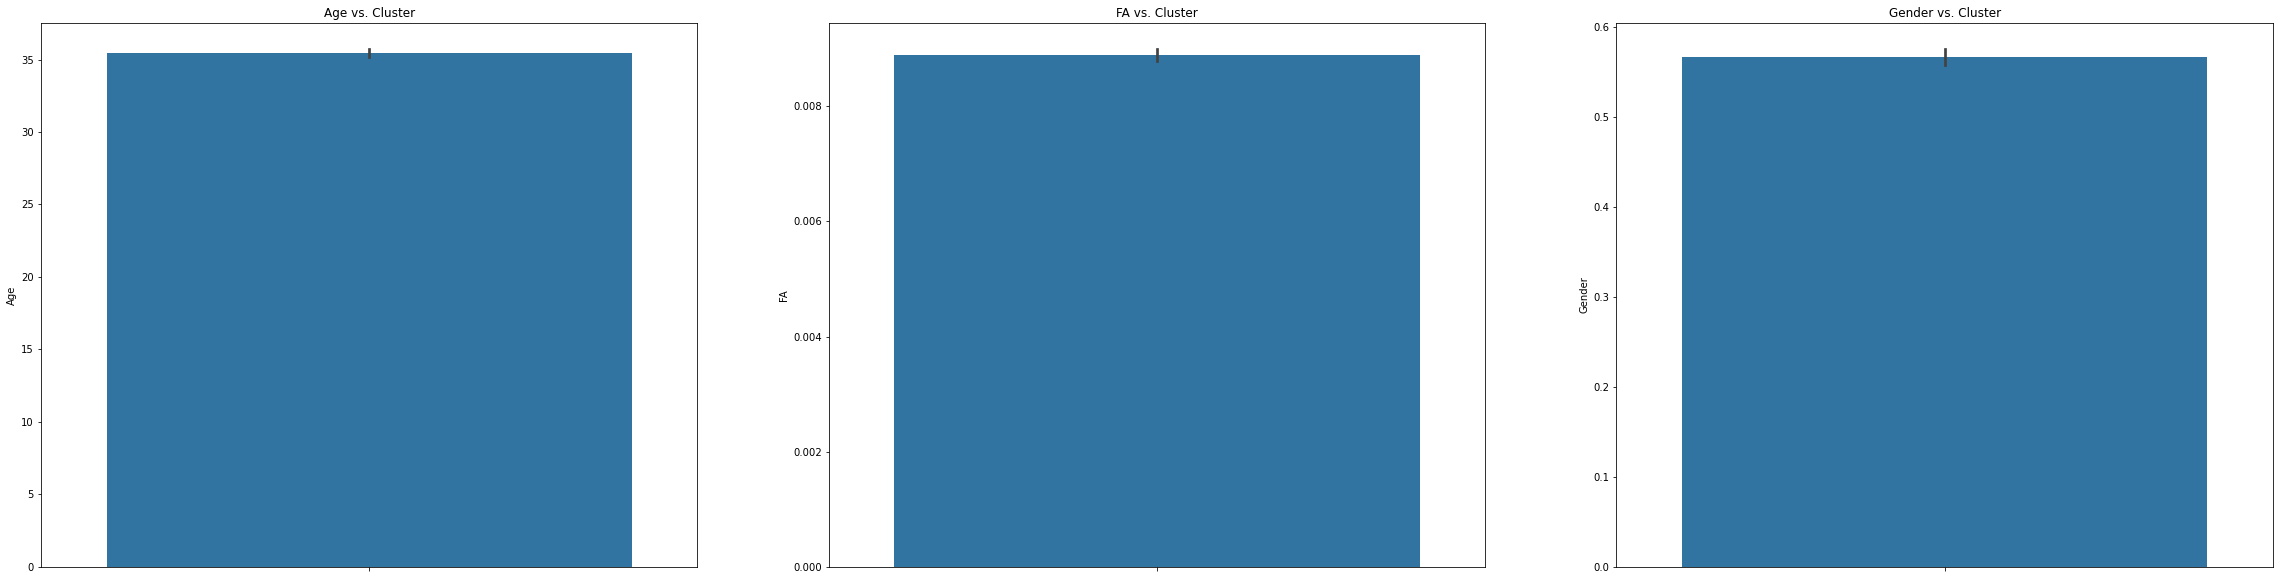

In [30]:
fig3, ax3 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=third_cluster['Age'],ax=ax3[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=third_cluster['FA'],ax=ax3[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=third_cluster['Gender'],ax=ax3[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)




(-0.0, 0.6)

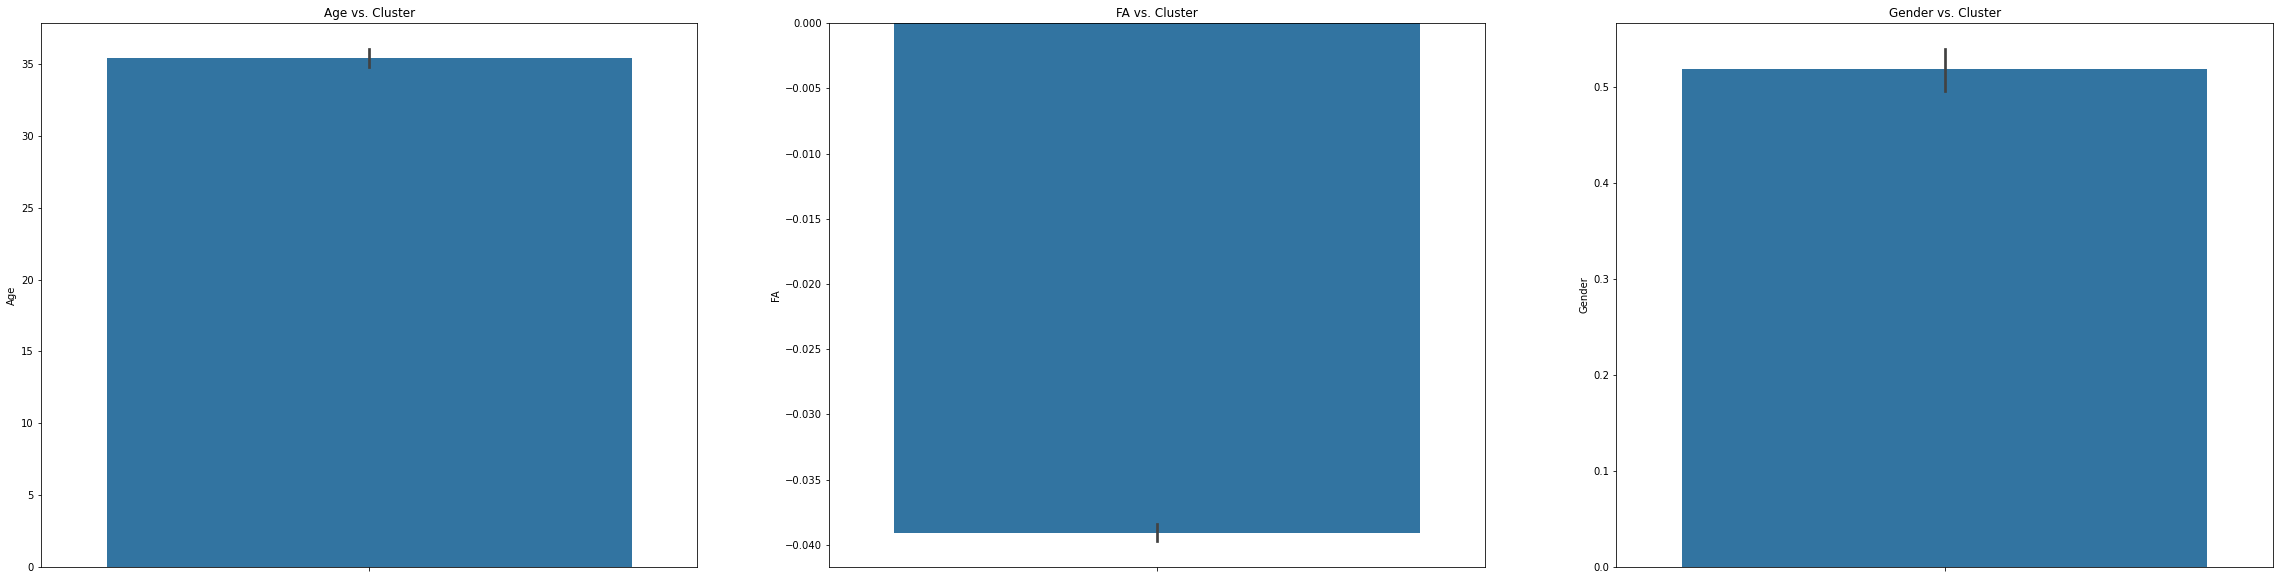

In [31]:
fig4, ax4 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=fourth_cluster['Age'],ax=ax4[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=fourth_cluster['FA'],ax=ax4[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=fourth_cluster['Gender'],ax=ax4[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)



(-0.0, 0.6)

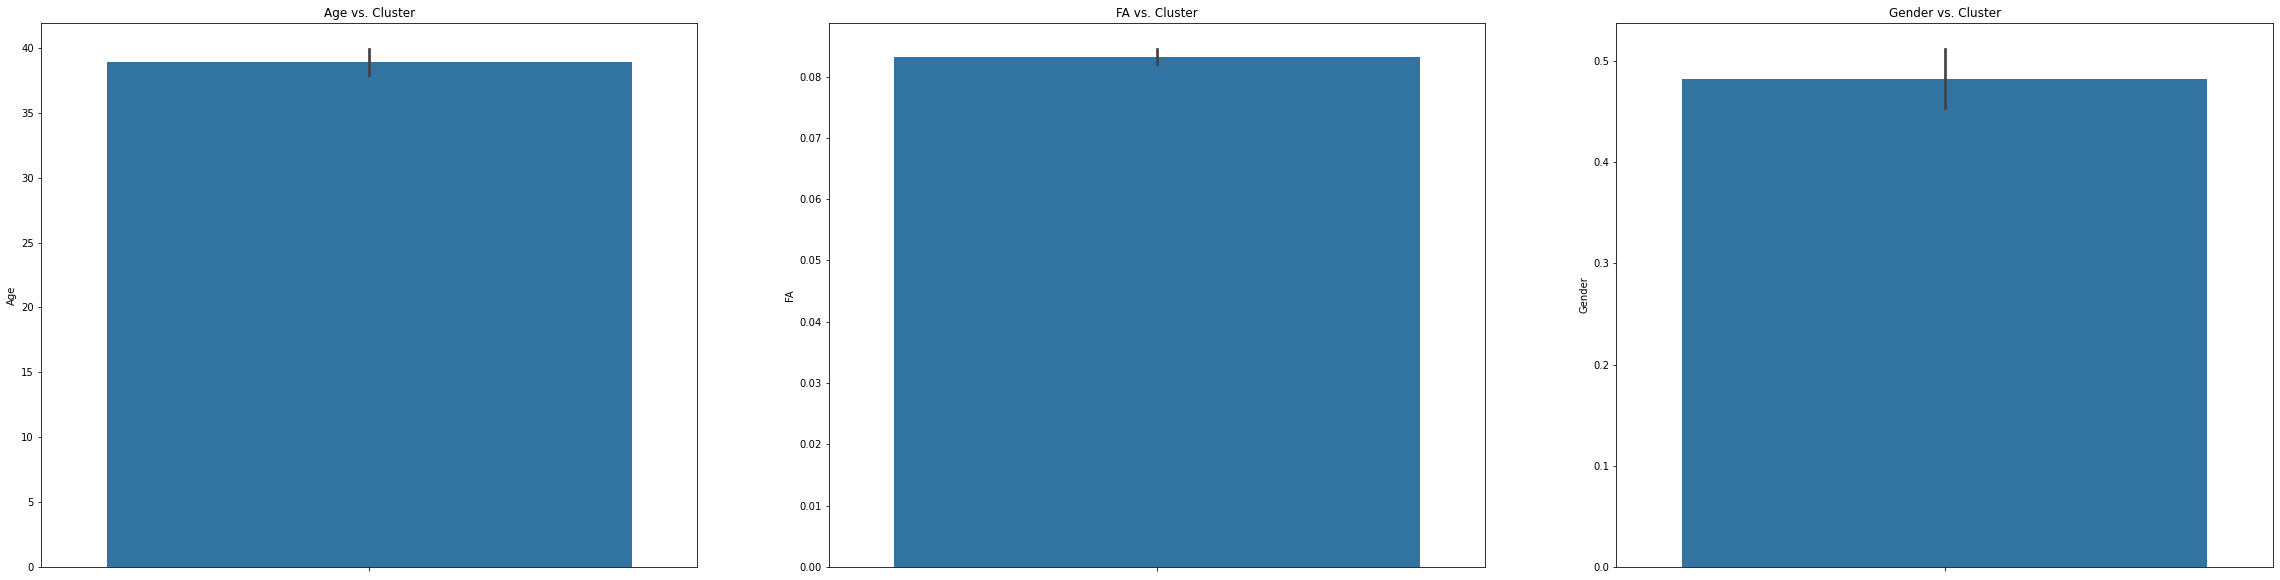

In [32]:
fig5, ax5 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c5['Age'],ax=ax5[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=c5['FA'],ax=ax5[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=c5['Gender'],ax=ax5[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)




(-0.0, 0.6)

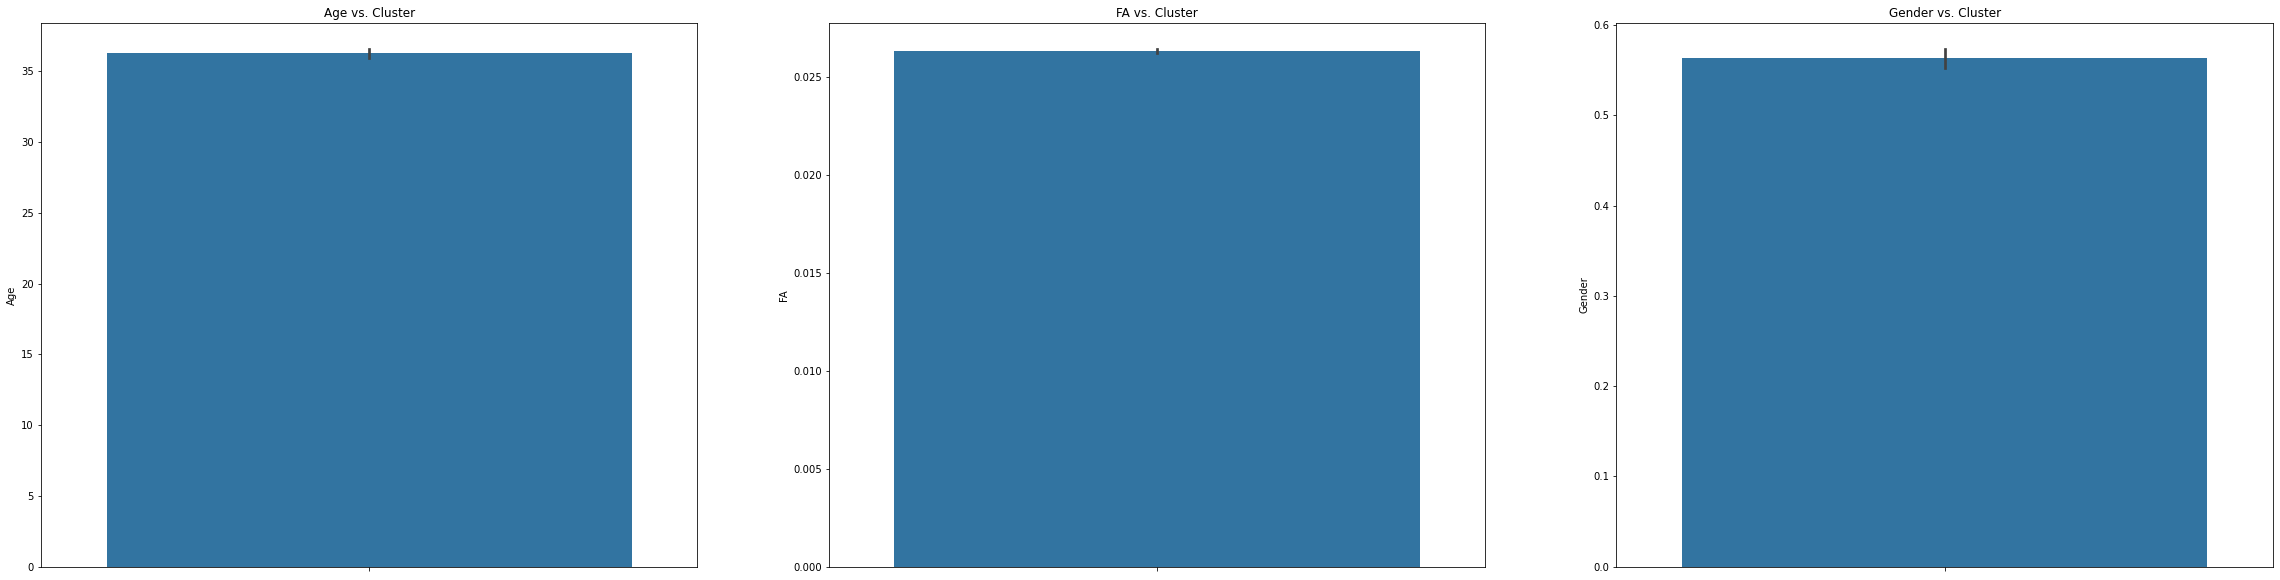

In [33]:
fig6, ax6 = plt.subplots(1, 3, figsize=(40, 10))
clusters = total_features.index
sns.barplot(y=c6['Age'],ax=ax6[0]).set(title = 'Age vs. Cluster')
sns.barplot(y=c6['FA'],ax=ax6[1]).set(title = 'FA vs. Cluster')
sns.barplot(y=c6['Gender'],ax=ax6[2]).set(title = 'Gender vs. Cluster')


# chaging y values
ax1[0].set_ylim(0,40)
ax1[1].set_ylim(-0.05,0.08)
ax1[2].set_ylim(-0.0,0.6)



### Plotting the different features together to see how the clustering was done

<AxesSubplot:xlabel='FA', ylabel='Age'>

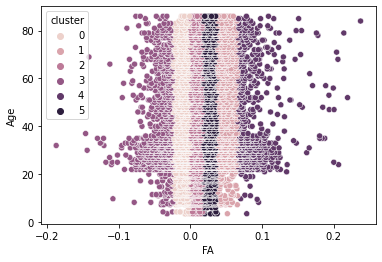

In [34]:
sns.scatterplot(y=cluster_map['Age'], x=cluster_map['FA'], hue=cluster_map['cluster'])

# This is the Evaluation Part

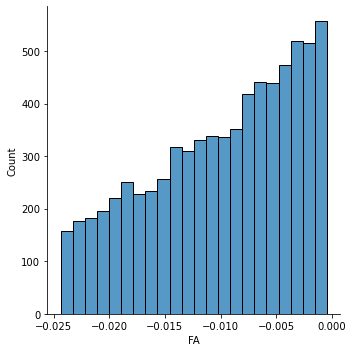

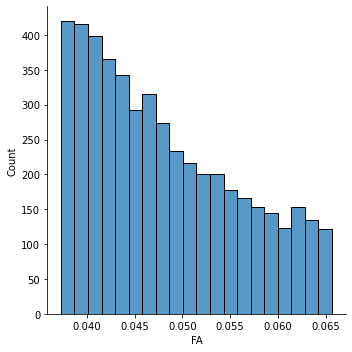

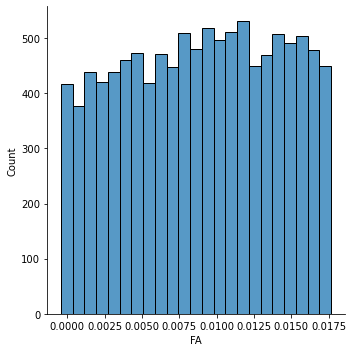

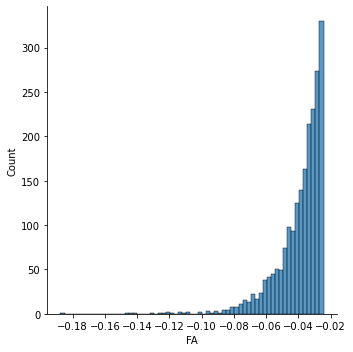

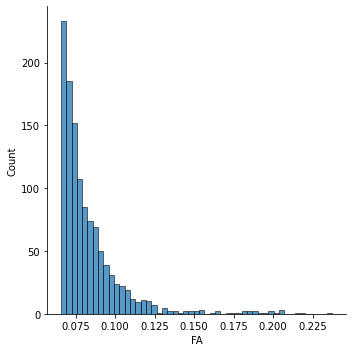

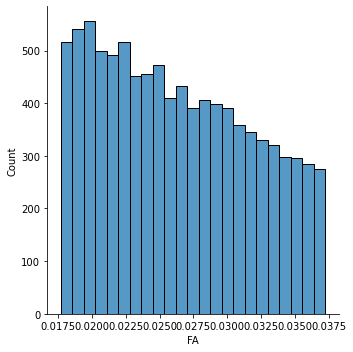

In [35]:
sns.displot(kind='hist',data=first_cluster['FA'])
sns.displot(kind='hist',data=second_cluster['FA'])
sns.displot(kind='hist',data=third_cluster['FA'])
sns.displot(kind='hist',data=fourth_cluster['FA'])
sns.displot(kind='hist',data=c5['FA'])
sns.displot(kind='hist',data=c6['FA'])




In [36]:
first_cluster['AgeGroup']

0         Child
11        Child
12        Child
34        Child
39        Child
          ...  
44565    Senior
44590    Senior
44593    Senior
44626    Senior
44638    Senior
Name: AgeGroup, Length: 7251, dtype: object

<AxesSubplot:xlabel='AgeGroup', ylabel='Area'>

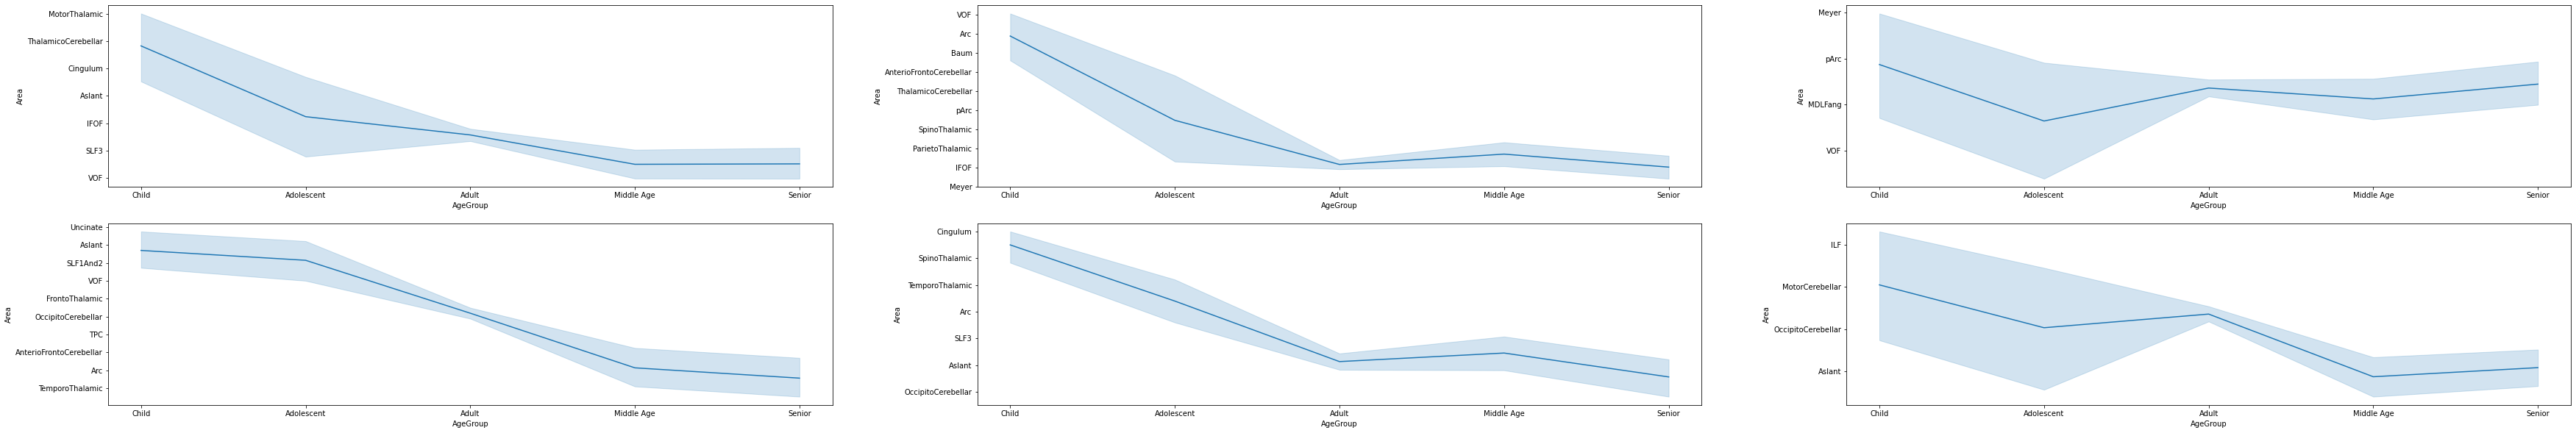

In [37]:
fig7, ax7 = plt.subplots(2, 3, figsize=(60, 10))
clusters = total_features.index
sns.lineplot(x=first_cluster['AgeGroup'], y=first_cluster['Area'],ax=ax7[0][0])
sns.lineplot(x=second_cluster['AgeGroup'], y=second_cluster['Area'],ax=ax7[0][1])
sns.lineplot(x=third_cluster['AgeGroup'], y=third_cluster['Area'],ax=ax7[0][2])
sns.lineplot(x=fourth_cluster['AgeGroup'], y=fourth_cluster['Area'],ax=ax7[1][0])
sns.lineplot(x=c5['AgeGroup'], y=c5['Area'],ax=ax7[1][1])
sns.lineplot(x=c6['AgeGroup'], y=c6['Area'],ax=ax7[1][2])



<AxesSubplot:xlabel='AgeGroup', ylabel='Category'>

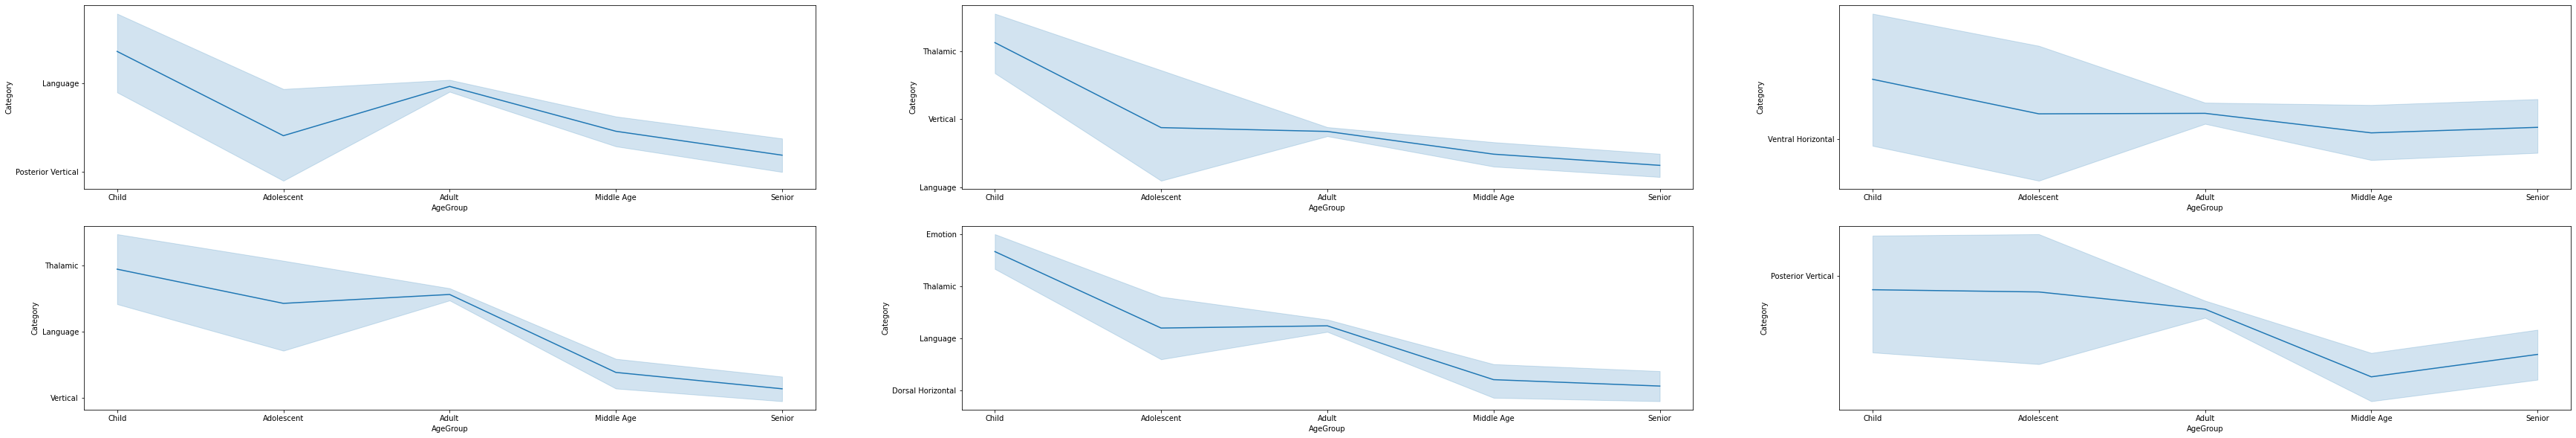

In [38]:
fig8, ax8 = plt.subplots(2, 3, figsize=(60, 10))
clusters = total_features.index
sns.lineplot(x=first_cluster['AgeGroup'], y=first_cluster['Category'],ax=ax8[0][0])
sns.lineplot(x=second_cluster['AgeGroup'], y=second_cluster['Category'],ax=ax8[0][1])
sns.lineplot(x=third_cluster['AgeGroup'], y=third_cluster['Category'],ax=ax8[0][2])
sns.lineplot(x=fourth_cluster['AgeGroup'], y=fourth_cluster['Category'],ax=ax8[1][0])
sns.lineplot(x=c5['AgeGroup'], y=c5['Category'],ax=ax8[1][1])
sns.lineplot(x=c6['AgeGroup'], y=c6['Category'],ax=ax8[1][2])


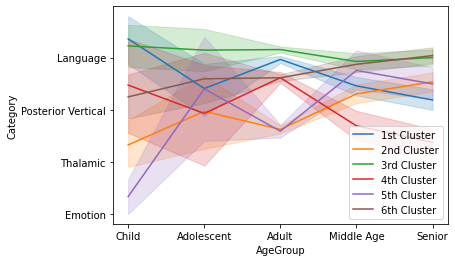

In [39]:
fig9,ax9 = plt.subplots(1,1)
sns.lineplot(x=first_cluster['AgeGroup'], y=first_cluster['Category'], label='1st Cluster')
sns.lineplot(x=second_cluster['AgeGroup'], y=second_cluster['Category'], label= '2nd Cluster')
sns.lineplot(x=third_cluster['AgeGroup'], y=third_cluster['Category'], label='3rd Cluster')
sns.lineplot(x=fourth_cluster['AgeGroup'], y=fourth_cluster['Category'], label='4th Cluster')
sns.lineplot(x=c5['AgeGroup'], y=c5['Category'], label='5th Cluster')
sns.lineplot(x=c6['AgeGroup'], y=c6['Category'], label='6th Cluster')
ax9.legend()

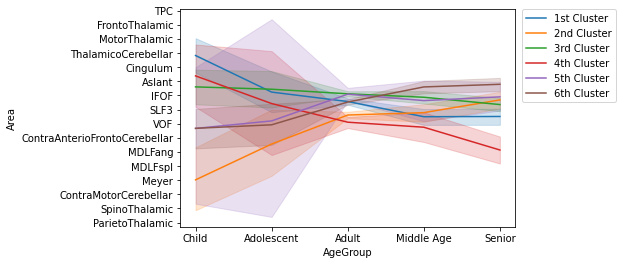

In [40]:
fig10,ax10 = plt.subplots(1,1)
sns.lineplot(x=first_cluster['AgeGroup'], y=first_cluster['Area'], label='1st Cluster')
sns.lineplot(x=second_cluster['AgeGroup'], y=second_cluster['Area'], label= '2nd Cluster')
sns.lineplot(x=third_cluster['AgeGroup'], y=third_cluster['Area'], label='3rd Cluster')
sns.lineplot(x=fourth_cluster['AgeGroup'], y=fourth_cluster['Area'], label='4th Cluster')
sns.lineplot(x=c5['AgeGroup'], y=c5['Area'], label='5th Cluster')
sns.lineplot(x=c6['AgeGroup'], y=c6['Area'], label='6th Cluster')
ax10.legend(bbox_to_anchor=(1.02,1), loc='upper left', borderaxespad=0)